# Deliverable 2
This is the notebook that has the second deliverable.

Table of Contents <br>

0. Import Modules
1. Data reading
2. Descriptive data analysis
3. Ways to enrich, filter, transform the data
4. Plan and Ideas for Methods

# 0. Import modules
Feel free to use the virtual environment (amonavis) included in the GitHub folder.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import networkx as nx


# For semantic similarity
from urllib.parse import unquote
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Python functions in .py file to read data
import data_readers

/Users/danielebelfiore/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/danielebelfiore/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Data reading
The following code reads the data and saves them in the appropriate variables.
<br><br>
**Wikispeedia**
This will hold our graph where Wikipedia articles are nodes and links/paths between them are edges.

<br><br>
**finished_paths**
The datafile includes the hashedIpAddress, timestamp, durationInSec, path, and rating of games that were completed.
We also add columns with the first article (soruce), last article (target), path length (#articles), and a readable date in Timestamp format.

<br><br>
**unfinished_paths**
This datafile is similar to finished_paths, but with games that weren't completed. It has the hashedIpAddress, timestamp, durationInSec, path, target, and type of failure (either timeout or restart).

<br><br>
**articles**
Dataframe with the name of all articles in the dataset.

<br><br>
**categories**
This shows the higher category classification of each article. For example, Áedán mac Gabráin is part of 'subject.History.British_History.British_History_1500_and_before_including_Roman_Britain'

In [2]:
# The links and edges
wikispeedia = data_readers.read_wikispeedia_graph()

# The finished paths
finished_paths = data_readers.read_finished_paths()

# The unfinished paths
unfinished_paths = data_readers.read_unfinished_paths()

# List of all articles
articles = data_readers.read_articles()

# List of all articles and their categories
categories = data_readers.read_categories()


# We found out later that the data contained in the shortest path matrix given to us seems to be wrong
# Here we also add a quick dictionary that properly shows that this is wrong, and give an example
shortest_path_df = data_readers.read_shortest_path_df()
shortest_path_dict = dict(nx.all_pairs_shortest_path(wikispeedia))

# Searching for the string of a given article. It has to be formatted like the article name
# Which shouldn't be a problem, as we'll probably usually retrieve them internally
obi_wan_text = data_readers.plaintext_article_finder('Obi-Wan_Kenobi')

In [3]:
print("Dataset has", len(wikispeedia.nodes), "nodes")
print("Dataset has", len(wikispeedia.edges), "edges")

Dataset has 4592 nodes
Dataset has 119882 edges


These are less nodes than the reported number, it should be 4,604 nodes.

The 119,882 edges is correct though.

The difference is probably due to some nodes not being connected to the rest of the graph, as here we read in only the articles that are connected. The few nodes that we are losing do not matter for what we need.

In [4]:
# Let's print a sample of each datafram to make sure they were read in correctly.
finished_paths.sample(5)

,hashedIpAddress,timestamp,durationInSec,path,rating,first_article,last_article,path_length,date
30054,7636613643de6e50,1367439554,120,Proxima_Centauri;South_Africa;Citrus;Juice;Fru...,NaN,Proxima_Centauri,Mango,6,2013-05-01 20:19:14
6106,4584a790178bd28f,1336222104,97,Manchester;Canal;Ocean;Seawater;Water,NaN,Manchester,Water,5,2012-05-05 12:48:24
6401,7a99e31f7debaf79,1366942620,96,Music;Culture;Human;Agriculture;Food;Vitamin;V...,3.0,Music,Vitamin_D,7,2013-04-26 02:17:00
41782,0d57c8c57d75e2f5,1287156983,152,Ku_Klux_Klan;Superman;Earth;Tide;Flood,NaN,Ku_Klux_Klan,Flood,5,2010-10-15 15:36:23
37195,0a11ab06174551d9,1251252501,201,Constantine_I;Roman_Empire;Danube;European_Uni...,NaN,Constantine_I,Barcelona,7,2009-08-26 02:08:21


In [5]:
unfinished_paths.sample(5)

,hashedIpAddress,timestamp,durationInSec,path,target,type
3845,605b6e447f9bc259,1306630320,301,Theatre;India;United_Nations;South_Africa;Afri...,Zebra,restart
22379,0ee75cdb367fbd88,1381891304,69,Writing;Library;Book,Dune,restart
12387,43ed9a467c525ef5,1348420761,172,Batman;Spring_Heeled_Jack;England;Rain;Brazil;...,Banana,restart
9813,526f5b9a62458d44,1343403735,163,Comet;Sun;Sunlight;Electromagnetic_radiation;P...,Speed_of_light,restart
20433,14e834724f159c93,1373672330,121,Carl_Jung;Humanities;Culture;20th_century;Comp...,PONG,restart


In [6]:
articles.sample(5)

,articles
110,Acid_rain
2101,Indian_Peafowl
1644,Gas_tungsten_arc_welding
4359,Victoria_of_the_United_Kingdom
3247,Piccadilly_Circus


In [7]:
categories.sample(5)

,article,categories
1403,Drought,subject.Geography.Climate_and_the_Weather
745,Boudica,subject.People.Historical_figures
2037,Gremlins,subject.Everyday_life.Films
162,Agnosticism,subject.Religion.Philosophy
190,Albrecht_D%C3%BCrer,subject.People.Mathematicians


In [8]:
shortest_path_df.head()

,"(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)","(%C3%85land,)","(%C3%89douard_Manet,)","(%C3%89ire,)","(%C3%93engus_I_of_the_Picts,)","(%E2%82%AC2_commemorative_coins,)","(10th_century,)","(11th_century,)","(12th_century,)","(13th_century,)",...,"(Ziad_Jarrah,)","(Zimbabwe,)","(Zinc,)","(Zinc_chloride,)","(Zion_National_Park,)","(Zionism,)","(Zirconium,)","(Zoroaster,)","(Zuid-Gelders,)","(Zulu,)"
"(%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,)",0,-1,-1,-1,-1,-1,3,3,3,3,...,4,3,3,4,4,3,4,4,4,2
"(%C3%85land,)",-1,0,-1,-1,-1,-1,2,2,2,2,...,4,2,3,4,4,3,4,3,3,3
"(%C3%89douard_Manet,)",-1,-1,0,-1,-1,-1,3,3,2,2,...,4,3,2,3,4,3,4,3,3,3
"(%C3%89ire,)",-1,-1,-1,0,-1,-1,3,3,3,3,...,4,2,2,3,4,3,4,4,3,3
"(%C3%93engus_I_of_the_Picts,)",-1,-1,-1,-1,0,-1,2,2,3,2,...,4,2,3,4,4,3,4,3,3,3


# 2. Descriptive Data Analysis
Here, we show that we understand what’s in the data (formats, distributions, missing values, correlations, etc.).


In this section:
<br>2.1. How many articles there are, how many paths 
<br>2.2. Histograms of the links from each article (for example, how many articles have 20 links, etc)
<br>2.3. Average distance from one article to any other article
<br>2.4. Histogram of the number of games at each point in time
<br>2.5. Understanding unfinished games: Categories of targets in unfinished games


### 2.1. How many: articles, links, finished games, unfinished games?


In [9]:
print("There are", len(wikispeedia.nodes), "articles in the dataset.")
print("There are", len(wikispeedia.edges), "links/paths.")
print("There are", finished_paths.shape[0], "finished games.")
print("There are", unfinished_paths.shape[0], "unfinished games.")

There are 4592 articles in the dataset.
There are 119882 links/paths.
There are 51318 finished games.
There are 24875 unfinished games.


In [10]:
unique_paths = finished_paths['path'].unique()
print('There are', len(unique_paths), 'unique finshed paths.')

There are 47856 unique finshed paths.


### 2.2. Degree of a Node
The degree of a node is the number of edges/links it has. We plot a complementary cumulative distribution function (CCDF) of degree for each article/node.

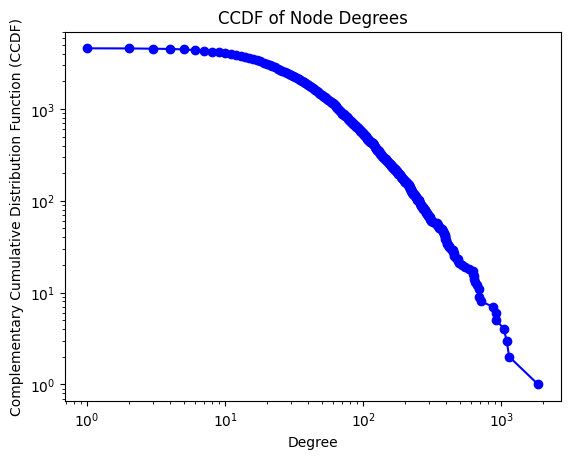

In [11]:
# Get the degrees of all nodes
degrees = dict(wikispeedia.degree())

# Calculate the CCDF
degree_values = sorted(set(degrees.values()), reverse=True)
ccdf = [sum(1 for degree in degrees.values() if degree >= d) for d in degree_values]

# Plot the CCDF
plt.plot(degree_values, ccdf, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Use log scale for better visualization
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Complementary Cumulative Distribution Function (CCDF)')
plt.title('CCDF of Node Degrees')
plt.show()

What are the "hubs"? Which nodes have more than 500 links?

In [12]:
print("Nodes with more than 1000 edges: ", [node for node in wikispeedia.nodes if wikispeedia.degree(node) >= 1000])
print("Nodes with more than 500 edges: ", [node for node in wikispeedia.nodes if wikispeedia.degree(node) >= 500])


Nodes with more than 1000 edges:  ['United_Kingdom', 'France', 'United_States', 'Europe']
Nodes with more than 500 edges:  ['Russia', 'United_Kingdom', 'World_War_II', 'France', 'Germany', 'Italy', 'Canada', 'English_language', 'England', 'Spain', 'United_States', 'India', 'China', 'Europe', 'Australia', 'Japan', 'London', 'Africa', 'Animal', 'Scientific_classification']


Observe that biggest hubs are mainly countries. The 'United Kingdom', 'France', 'United States', and 'Europe' have over 1000 links. Since there are 4592 nodes, these nodes have link to almost 1/4 of the dataset!

How many nodes have more than 20 links? How many have only 1 link?

In [13]:
# Count the number of nodes with degree 1
nodes_degree_1 = [node for node in wikispeedia.nodes if wikispeedia.degree(node) == 1]
print('Nodes with degree 1: ', nodes_degree_1)

# Get the percentages
total_nodes = len(wikispeedia.nodes)
percentage_degree_1 = (len(nodes_degree_1) / total_nodes)
print('% of nodes that have only 1 edge/link:', percentage_degree_1)

# Count number of nodes with degree <= 20
nodes_degree_20 = sum(1 for degree in degrees.values() if degree <= 20)
print('% of nodes that have 20 or less edges/links:', nodes_degree_20 / total_nodes)

Nodes with degree 1:  ['All_your_base_are_belong_to_us', 'Local_community', 'Dewey_Square', 'Emma_Roberts', 'Human_abdomen', 'Pere_Marquette_1225', 'Pro_Milone', 'Sunol_Water_Temple', 'T._D._Judah', 'Terik', 'Duchenne_muscular_dystrophy', 'Klinefelter%27s_syndrome', 'White_Mountain_art']
% of nodes that have only 1 edge/link: 0.0028310104529616726
% of nodes that have 20 or less edges/links: 0.344294425087108


### 2.3. Average Distance between Articles
On average, how many links/edges does it take to connect any random two articles?

In [14]:
# Our graph is not strongly connected, meaning it's not possible to reach every node from every other node
# So we can't use the built in function nx.average_shortest_path_length

# This takes a long time to run (30 sec)
shortest_paths = list(nx.all_pairs_shortest_path_length(wikispeedia))
reachable_pairs = [(source, target, length) for source, paths in shortest_paths for target, length in paths.items() if length != float('inf')]
total_distances = sum(length for _, _, length in reachable_pairs)
average_distance = total_distances / len(reachable_pairs) if reachable_pairs else 0
print(f"Average distance between reachable nodes: {average_distance:.2f}")


Average distance between reachable nodes: 3.20


### 2.4. Games per Time
Histogram of the number of games at each point in time.


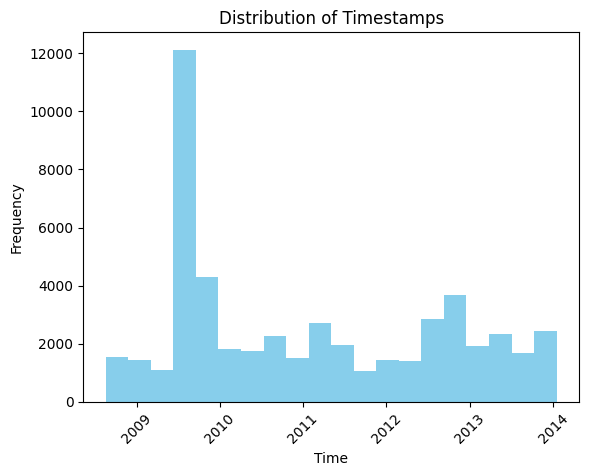

In [15]:
# Convert timestamps to datetime objects
timestamps = finished_paths['timestamp']
date_times = [datetime.utcfromtimestamp(ts) for ts in timestamps]

# Create a histogram of timestamps
plt.hist(date_times, bins=20, color='skyblue')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

A lot of games were played in Q3 2009! 

In [16]:
q3_2009_times = [dt for dt in date_times if dt.year == 2009 and dt.month in [7, 8, 9]]
percent_q3_2009_times = len(q3_2009_times) / len(date_times)
print(f"Percent of finished games completed in Q3 2009: {percent_q3_2009_times:.2f}")


Percent of finished games completed in Q3 2009: 0.24


### 2.5. Which categories of games are more likely to be unfinished? 

In [17]:
print('There are', categories['article'].duplicated().sum(), 'articles with more than 1 category.')

print('Should we drop the duplicate categories, or doublecount them?')
print('This corresponds to', categories['article'].duplicated().sum() / len(wikispeedia.nodes), 'of the articles.')

# Let's drop them for now.
categories['article'] = categories['article'].drop_duplicates()
print('The new shape is: ',categories.shape)

# Why are there more articles here than nodes (# articles)?

There are 606 articles with more than 1 category.
Should we drop the duplicate categories, or doublecount them?
This corresponds to 0.13196864111498258 of the articles.
The new shape is:  (5204, 2)


In [18]:
# Let's use string manipulation to extract the highest level category for each article.

sub_categories = categories['categories'].str[8:].str.split('.')
category_depth_1 = sub_categories.apply(lambda x: x[0])
categories['depth_1'] = category_depth_1
categories.head()

,article,categories,depth_1
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,History
1,NaN,subject.People.Historical_figures,People
2,%C3%85land,subject.Countries,Countries
3,NaN,subject.Geography.European_Geography.European_...,Geography
4,%C3%89douard_Manet,subject.People.Artists,People


Let's find the category corresponding to each unfinished target.

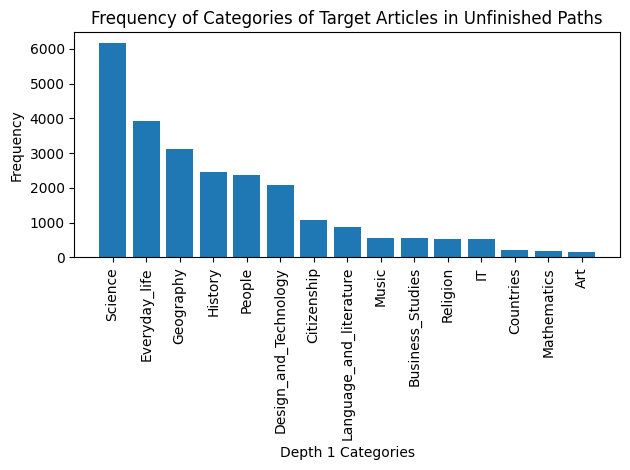

In [19]:
# Merging categories with unfinished paths.
unfinished_paths_with_categories = pd.merge(unfinished_paths, categories, left_on = 'target', right_on= 'article', how = 'left')

# Count the occurrences of each category
category_counts = unfinished_paths_with_categories['depth_1'].value_counts()

# Plotting the bar chart
plt.bar(category_counts.index, category_counts.values)

# Adding labels and title
plt.xlabel('Depth 1 Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories of Target Articles in Unfinished Paths')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area

Notice that targets in the science category make up the largest proportion of unfinished games. In Deliverable 3, we will investigate this more. We'll discover if this is because most of the articles are from the science category, or if science articles are actually harder to find in the game.

### 2.6 Issue with the shortest path
The shortest paths that were calculated are wrong. This is just a simple example to show that at least one of the points is wrong. We assume this is common enough elsewhere, as the effort needed to properly prove this is too large.

We double-checked the method for reading in the data, and there are no big changes to be done there. We also double-checked that the graph is a directed graph, which matters for this search. Additionally, we manually checked the edges, so we know that the following example is correct.

In [20]:
# We have to put the strings into tuples to make this work. It's ugly, but this works
print("Shortest path from Actor to Japan in the given matrix is:", shortest_path_df[('Actor',)][('Japan',)])

print("Shortest path from Actor to Japan according to networkX is:", len(shortest_path_dict['Actor']['Japan'])-1)

print("The actual path is:", shortest_path_dict['Actor']['Japan'])

Shortest path from Actor to Japan in the given matrix is: 3
Shortest path from Actor to Japan according to networkX is: 1
The actual path is: ['Actor', 'Japan']


In [21]:
# No need to print the entire text, just show that reading it in works
obi_wan_text[:100]

'   #copyright\n\nObi-Wan Kenobi\n\n2007 Schools Wikipedia Selection. Related subjects: Films\n\n   Star Wa'

### 2.7. Study of Unique Paths
Here we study the unique source and target pairs. We will use the dataframes to compare the performance between humans and machines, as well as to know what paths to make machines complete.

**article_combinations**

This dataframe contains information on all the combination of source and target articles in the finished games (paths). It includes how many times it has been played, and the mean and std of the path length, duration of the game, and rating.

**unique_targets** and **unique_sources**

These dataframes include all the sources and targets that appears in the finished games

<br><br>
Note that we don't change to ASCII the name of the articles yet. We will do it at a later step if we need to.
<br><br>

In [22]:
# How many each pair of articles has been visited
article_combinations_count = finished_paths.groupby(['first_article', 'last_article']).size().reset_index(name='count')

# The mean and std of the path length for each pair of articles
article_combinations_stats = finished_paths.groupby(['first_article', 'last_article'])['path_length'].agg(['mean', 'std']).reset_index()
article_combinations_stats['std'] = article_combinations_stats['std'].fillna(0)
article_combinations_stats.rename(columns={'mean': 'mean_length', 'std': 'std_length'}, inplace=True)

# The mean and std of the rating for each pair of articles. 
    # Note that mean and std may be nan if there are nan ratings. We purposely leave them as nan, as we don't want to fill them with 0s or 1s.
    # Depending on the application, we could change this in the future if neeeded.
rating_combinations_stats_rating = finished_paths.groupby(['first_article', 'last_article'])['rating'].agg(['mean', 'std']).reset_index()
#rating_combinations_stats_rating['std'] = rating_combinations_stats_rating['std'].fillna(0)
mask = rating_combinations_stats_rating['mean'].notnull()
rating_combinations_stats_rating.loc[mask, 'std'] = rating_combinations_stats_rating.loc[mask, 'std'].fillna(0)
rating_combinations_stats_rating.rename(columns={'mean': 'mean_rating', 'std': 'std_rating'}, inplace=True)

# The mean and std of the time for each pair of articles.
rating_combinations_stats_time = finished_paths.groupby(['first_article', 'last_article'])['durationInSec'].agg(['mean', 'std']).reset_index()
rating_combinations_stats_time['std'] = rating_combinations_stats_time['std'].fillna(0)
rating_combinations_stats_time.rename(columns={'mean': 'mean_durationInSec', 'std': 'std_durationInSec'}, inplace=True)

# Merging all the dataframes
article_combinations = pd.merge(article_combinations_count, article_combinations_stats, on=['first_article', 'last_article'])
article_combinations = pd.merge(article_combinations, rating_combinations_stats_rating, on=['first_article', 'last_article'])
article_combinations = pd.merge(article_combinations, rating_combinations_stats_time, on=['first_article', 'last_article'])

# The number of unique sources and targets
unique_sources = finished_paths['first_article'].value_counts().reset_index()
unique_targets = finished_paths['last_article'].value_counts().reset_index()

In [23]:
article_combinations.sample(5)

,first_article,last_article,count,mean_length,std_length,mean_rating,std_rating,mean_durationInSec,std_durationInSec
10709,George_H._W._Bush,World_War_II,1,3.00,0.000000,1.0,0.0,57.000000,0.000000
9649,Fieldfare,Alphabet,2,6.00,1.414214,1.0,0.0,47.500000,4.949747
23738,Soup,21st_century,2,4.00,1.414214,1.0,0.0,26.500000,2.121320
11580,Grover_Cleveland,United_Arab_Emirates,4,5.75,2.872281,2.0,1.0,108.250000,67.029222
25610,The_Seagull,Pretoria,3,6.00,1.732051,3.0,0.0,132.666667,133.080176


In [24]:
unique_sources.sample(5)

,first_article,count
2120,Blackcap,9
2265,Brabantian,9
1895,Puffin,10
3700,Sgt._Pepper%27s_Lonely_Hearts_Club_Band,3
729,Niagara_Falls,17


In [25]:
unique_targets.sample(5)

,last_article,count
20,Ocean,102
2140,Mining,7
1941,Macbeth_of_Scotland,8
2862,John_Flamsteed,5
952,Mary_I_of_Scotland,16


### 2.8. Study of hubs
In the original paper, the authors make a point that hubs are used too commonly by users, and that this might not often be the case for the shortest path.

We want to double check if that holds or not, by checking the number of times a node is used in the paths given in the dataset, versus the number of times they appear in the actual shortest paths.

The only important caveat for this is that the networkX only returns one of the shortest paths, and there might be multiple. It is possible that the different alternate paths give a different result, but for now this is good enough.

Text(0.5, 1.0, 'Appearances in paths versus degree')

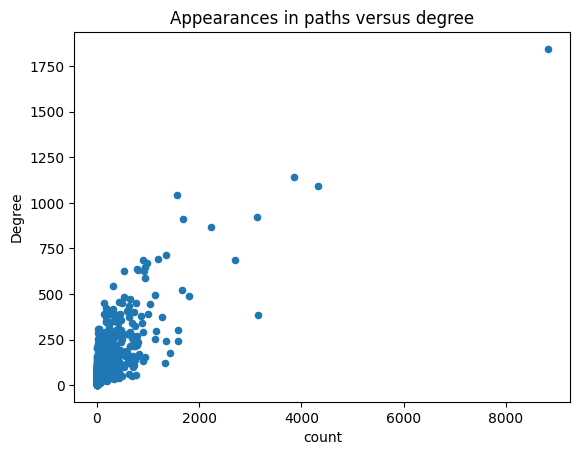

In [26]:
paths_finished = pd.read_csv('datasets/wikispeedia_paths-and-graph/paths_finished.tsv', sep='\t', skiprows=15,
                             names=['hashedIpAddress', 'timestamp', "durationInSec", 'path', "rating"])

# This is just splitting all the values in paths, and doing a value count for each one of those!
paths_per_step = paths_finished['path'].apply(lambda x: x.split(';')[1:-1])
node_appearance_counts = paths_per_step.explode().value_counts()
node_appearance_counts = node_appearance_counts.rename_axis('Node_Name').reset_index()

# For this, we add the information of the degree of each node, because it's interesting!
degree_dict = dict(wikispeedia.degree())
node_appearance_counts['Degree'] = node_appearance_counts['Node_Name'].map(degree_dict)

node_appearance_counts.plot.scatter('count', 'Degree')
plt.title('Appearances in paths versus degree')

In [27]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='count ~ Degree', data=node_appearance_counts)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     5090.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:43:06   Log-Likelihood:                -22069.
No. Observations:                3405   AIC:                         4.414e+04
Df Residuals:                    3403   BIC:                         4.416e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.6768      3.364    -22.794      0.0

Based on the regression analysis, there is a correlation between how often a node is used in the paths and the degree. So this idea of players using a hub is definitely common for the human dataset.

We can also see that there is a high R squared, considering there is only one variable. So the degree does help explain how often it will appear in the paths.

Now, does this actually hold for the shortest paths?

Text(0.5, 1.0, 'Appearances in paths versus degree shortest paths')

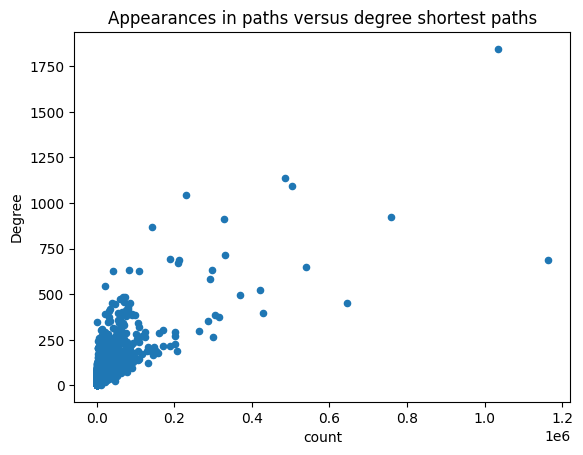

In [28]:
shortest_path_dict = dict(nx.all_pairs_shortest_path(wikispeedia))

# So, we also remove the first and last element in here
shortest_path_df = pd.DataFrame(shortest_path_dict)
shortest_path_df = pd.melt(shortest_path_df)
# This column is not useful
shortest_path_df = shortest_path_df.drop(['variable'], axis=1)
shortest_path_df = shortest_path_df['value'].dropna()
# This is to remove source and target, to keep the comparison similar
shortest_path_df = shortest_path_df.apply(lambda x: x[1:-1])
# This is to only keep lists that actually have at least one element
shortest_path_df = shortest_path_df[shortest_path_df.map(lambda x: len(x)>0)]

shortest_app_counts = shortest_path_df.explode().value_counts()
shortest_app_counts = shortest_app_counts.rename_axis('Node_Name').reset_index()
shortest_app_counts['Degree'] = shortest_app_counts['Node_Name'].map(degree_dict)

shortest_app_counts.plot.scatter('count', 'Degree')
plt.title('Appearances in paths versus degree shortest paths')

In [29]:
mod = smf.ols(formula='count ~ Degree', data=shortest_app_counts)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     4771.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:44:25   Log-Likelihood:                -46255.
No. Observations:                3970   AIC:                         9.251e+04
Df Residuals:                    3968   BIC:                         9.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.118e+04    539.844    -20.715      0.0

While the R squared is lower, it is still quite high in this case. Most importantly, it also shows that there is a correlation between the degree and the number of times it appears in a shortest path!

So this implies that hubs are actually very helpful for finding out the path between two nodes, and are commonly used.

This is something that can be used in our AI, and maybe further in other analysis.

# 3. Ways to enrich, filter, transform the data

## 3.1 Semantic Similarity

An important part of the project is to study how humans and machines move from article to article. Semantic similarity compares two strings based on a trained model and assigns a value according to how are they correlated (the higher, the more related). For example, 'king' and 'queen' will have a higher semantic similarity than say, 'king' and 'chemistry' (will prove this here).

### Remove the underscore and decode the url

First we define a function that corrects the strings to have a readable format. For example, '%C3%89douard_Manet' is transformed to 'Édouard Manet'.

We will create a function to decode a word, and we will be able to use it in series and dataframes using apply().

In [30]:
def decode_word(word):
    word = word.replace('_', ' ')
    return unquote(word)

In [31]:
articles['articles'].head(5)

0    %C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1                          %C3%85land
2                  %C3%89douard_Manet
3                           %C3%89ire
4          %C3%93engus_I_of_the_Picts
Name: articles, dtype: object

In [32]:
articles['articles'].apply(decode_word).head(5)

0        Áedán mac Gabráin
1                    Åland
2            Édouard Manet
3                     Éire
4    Óengus I of the Picts
Name: articles, dtype: object

### Semantic Distance Model
We create a function that returns the semantic similarity between two words you provide.

In [33]:
# We define the model outside the function (make sure to run this before using the function)
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [34]:
# Function to get embeddings (just because we will use it in semantic similarity function)
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

# Semantic similarity function
def semantic_similarity(word1, word2):
    embedding1 = get_embedding(word1)
    embedding2 = get_embedding(word2)
    return cosine_similarity(embedding1.detach().numpy(), embedding2.detach().numpy())[0][0]

In [35]:
semantic_similarity('king', 'queen')

0.9388244

In [36]:
semantic_similarity('king', 'chemistry')

0.655022

### Semantic Distance Matrix
Provided a series, it creates a df where indices and column names are the strings of the series, and fills the matrix with the semantic similarity between all words in the provided series.

In [37]:
def semantic_similarity_matrix(titles):
    df = pd.DataFrame(index=titles, columns=titles)
    for i in range(len(titles)):
        for j in range(i+1, len(titles)):
            embedding1 = get_embedding(titles[i])
            embedding2 = get_embedding(titles[j])
            similarity = cosine_similarity(embedding1.detach().numpy(), embedding2.detach().numpy())[0][0]
            df.iloc[i, j] = similarity
            df.iloc[j, i] = similarity  # Copy value to lower triangle
            np.fill_diagonal(df.values, 1)
    return df

In [38]:
semantic_similarity_matrix(pd.Series(['king', 'queen', 'chemistry', 'biology']))

,king,queen,chemistry,biology
king,1,0.938824,0.655022,0.734002
queen,0.938824,1,0.633365,0.745616
chemistry,0.655022,0.633365,1,0.846376
biology,0.734002,0.745616,0.846376,1


# 4. Plan and Ideas for Methods


## 4.1 Basic AI using A* Algorigm

Most of the model requires for there to be an AI model we can compare it against.

We were indicated by the TA to not focus on this too much, as this is a data analysis course, not an ML course. Because of this, we took the implementation of A\* that was included in networkX and created two modified versions that now do the following:
- First version returns all of the explored nodes, not just the shortest path found
- Second version is forced to do a depth first search without being able to return

For our purposes, the explored nodes is the most interesting metric, as it describes what were the links "clicked".

We found a paper that implements a more complicated version, and we might be able to do something with graph neural networks, but for now this is good enough.

We additionally do a bit of work to show how the system works timewise, as well as how the comparison will work in the future.

The time comparison is not super useful though, as that will depend on hardware too much to be worth using easily.

In [39]:
import machine_searchers
import time

def modded_get_embedding(text: str):
    temp_str = text.replace('_', ' ')
    temp_str = unquote(temp_str)
    inputs = tokenizer(temp_str, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

def distance_two_words(w1: str, w2: str):
    """Receives a string that was in the wikispeedia dataset, and transforms it as needed to work
    with the berd embeddings."""

    embedding1 = modded_get_embedding(w1)
    embedding2 = modded_get_embedding(w2)
    similarity = cosine_similarity(embedding1.detach().numpy(), embedding2.detach().numpy())[0][0]
    # Adding absolute, just in case it is needed
    # Similarity is actually 1 - abs(similarity) + 1,
    # As we want closer words to have a smaller distance
    # The last plus one is to indicate that there would be an extra cost to exploring, as if not the system often
    # thinks that there are nodes that have a distance of 0.5 or something like that
    similarity = 1 - abs(similarity) + 1
    # print("First word:", w1, ". Second word:", w2, ". GoodDistance:", similarity)
    return similarity

start_time = time.time()
lib_path_1, lib_explore_1 = machine_searchers.modded_astar_path(wikispeedia, 'Actor', 'Japan', heuristic=distance_two_words)
end_time = time.time()

# It's len - 1 because the target node is also included, and that node wasn't explored
print("Using the modded a star that returns explored nodes:")
print(" Found solution for Actor to Japan exploring the following number of nodes:", len(lib_explore_1)-1)
print(" Found it in:", end_time-start_time)

start_time = time.time()
lib_path_2, lib_explore_2 = machine_searchers.only_depth_first_astar_path(wikispeedia, 'Actor', 'Japan', heuristic=distance_two_words)
end_time = time.time()

# It's len - 1 because the target node is also included, and that node wasn't explored
print("Using depth first only A star that returns explored nodes:")
print(" Found solution for Actor to Japan exploring the following number of nodes:", len(lib_explore_1)-1)
print(" Found it in:", end_time-start_time)


Using the modded a star that returns explored nodes:
 Found solution for Actor to Japan exploring the following number of nodes: 1
 Found it in: 0.28297972679138184
Using depth first only A star that returns explored nodes:
 Found solution for Actor to Japan exploring the following number of nodes: 1
 Found it in: 0.28656792640686035


Now we'll take the most commonly explored node pair path, run it through the two algorithms and see what is the result!

In [40]:
# So it's finding the length between asteroid and viking
article_combinations.sort_values('count', ascending=False).head()

,first_article,last_article,count,mean_length,std_length,mean_rating,std_rating,mean_durationInSec,std_durationInSec
2318,Asteroid,Viking,1043,7.516779,3.019205,2.554455,0.980963,202.216683,281.960852
4427,Brain,Telephone,1040,7.100000,3.580183,2.482051,1.043248,174.138462,189.381553
25700,Theatre,Zebra,905,7.836464,3.849462,2.635359,1.044531,251.068508,1169.866464
21255,Pyramid,Bean,642,8.246106,4.259726,2.677419,1.010459,199.085670,191.480244
3206,Batman,Wood,148,7.263514,3.413382,2.851852,1.199478,113.466216,141.024406


In [41]:
start_time = time.time()
lib_path_1, lib_explore_1 = machine_searchers.modded_astar_path(wikispeedia, 'Asteroid', 'Viking', heuristic=distance_two_words)
end_time = time.time()

# It's len - 1 because the target node is also included, and that node wasn't explored
print("Using the modded a star that returns explored nodes:")
print(" Found solution for Asteroid to Viking exploring the following number of nodes:", len(lib_explore_1)-1)
print("Path length was:", len(lib_path_1)-1)
print(" Found it in:", end_time-start_time)

start_time = time.time()
lib_path_2, lib_explore_2 = machine_searchers.only_depth_first_astar_path(wikispeedia, 'Asteroid', 'Viking', heuristic=distance_two_words)
end_time = time.time()
print('')

# It's len - 1 because the target node is also included, and that node wasn't explored
print("Using depth first only A star that returns explored nodes:")
print(" Found solution for Asteroid to Viking exploring the following number of nodes:", len(lib_explore_2)-1)
print("Path length was:", len(lib_path_2)-1)
print(" Found it in:", end_time-start_time)

Using the modded a star that returns explored nodes:
 Found solution for Asteroid to Viking exploring the following number of nodes: 52
Path length was: 3
 Found it in: 45.73216009140015

Using depth first only A star that returns explored nodes:
 Found solution for Asteroid to Viking exploring the following number of nodes: 40
Path length was: 40
 Found it in: 69.77429604530334


In [42]:
lib_path_1

['Asteroid', '1_Ceres', 'Paris', 'Viking']

So, based on the previous example of the path, this works out well enough. The systems spends a lot of time exploring and going back, which might be a common issue. There is a huge disconnect between explored and actual path length, but that is common for A\*, so it's an expected caveat.

It is interesting to note that the optimal solution passed through Paris, which seems to fit the definition of being one of the hubs that are described in the paper. Maybe the hub strategy is actually useful in most cases!

The depth first method took a lot longer to run than planned. Based on this, it might be worth considering other alternatives.

But still, at least we've proven the model works, and can give results that we can compare against humans. Again, this is using a much simpler method, but this could be enhanced in the future.